# Statistical Analysis
- cumulative distribution function
- skew and kurtosis of data

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from datetime import date
import pandas as pd
import scipy

In [19]:
import warnings
warnings.filterwarnings("ignore")

# Data

### Depths

In [20]:
depth_EB = [50, 75, 100, 250, 500, 750, 950, 1000, 1250, 1500, 1600, 1750]
depth_WB = [50, 75, 100, 250, 500, 750, 1000, 1250, 1500, 1600, 1750]

### Gridded Dataset

In [21]:
file_name = "data/Rockall-Trough-Mooring-Time-Series-2020.nc"
ds = xr.open_dataset(file_name)

ds.coords['DEPTH'] = ds.PRES

ds['TG_EAST_C'] = ds.TG_EAST-273.15
ds.TG_EAST_C.attrs = ds.TG_EAST.attrs 
ds.TG_EAST_C.attrs['units'] = 'degC'
ds.TG_EAST_C.attrs

ds['TG_WEST_C'] = ds.TG_WEST-273.15
ds.TG_WEST_C.attrs = ds.TG_WEST.attrs 
ds.TG_WEST_C.attrs['units'] = 'degC'
ds.TG_WEST_C.attrs;

ds = ds[['TG_EAST_C', 'TG_WEST_C']] #, 'SG_EAST', 'SG_WEST']]
ds1D = ds.resample(TIME = "1D").mean(keep_attrs=True)

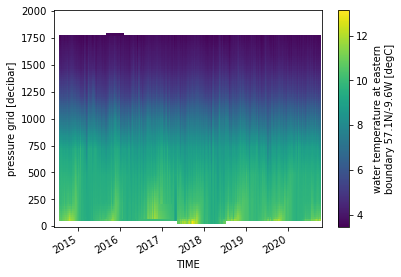

In [28]:
ds1D.TG_EAST_C.plot(x='TIME')

# Distribution

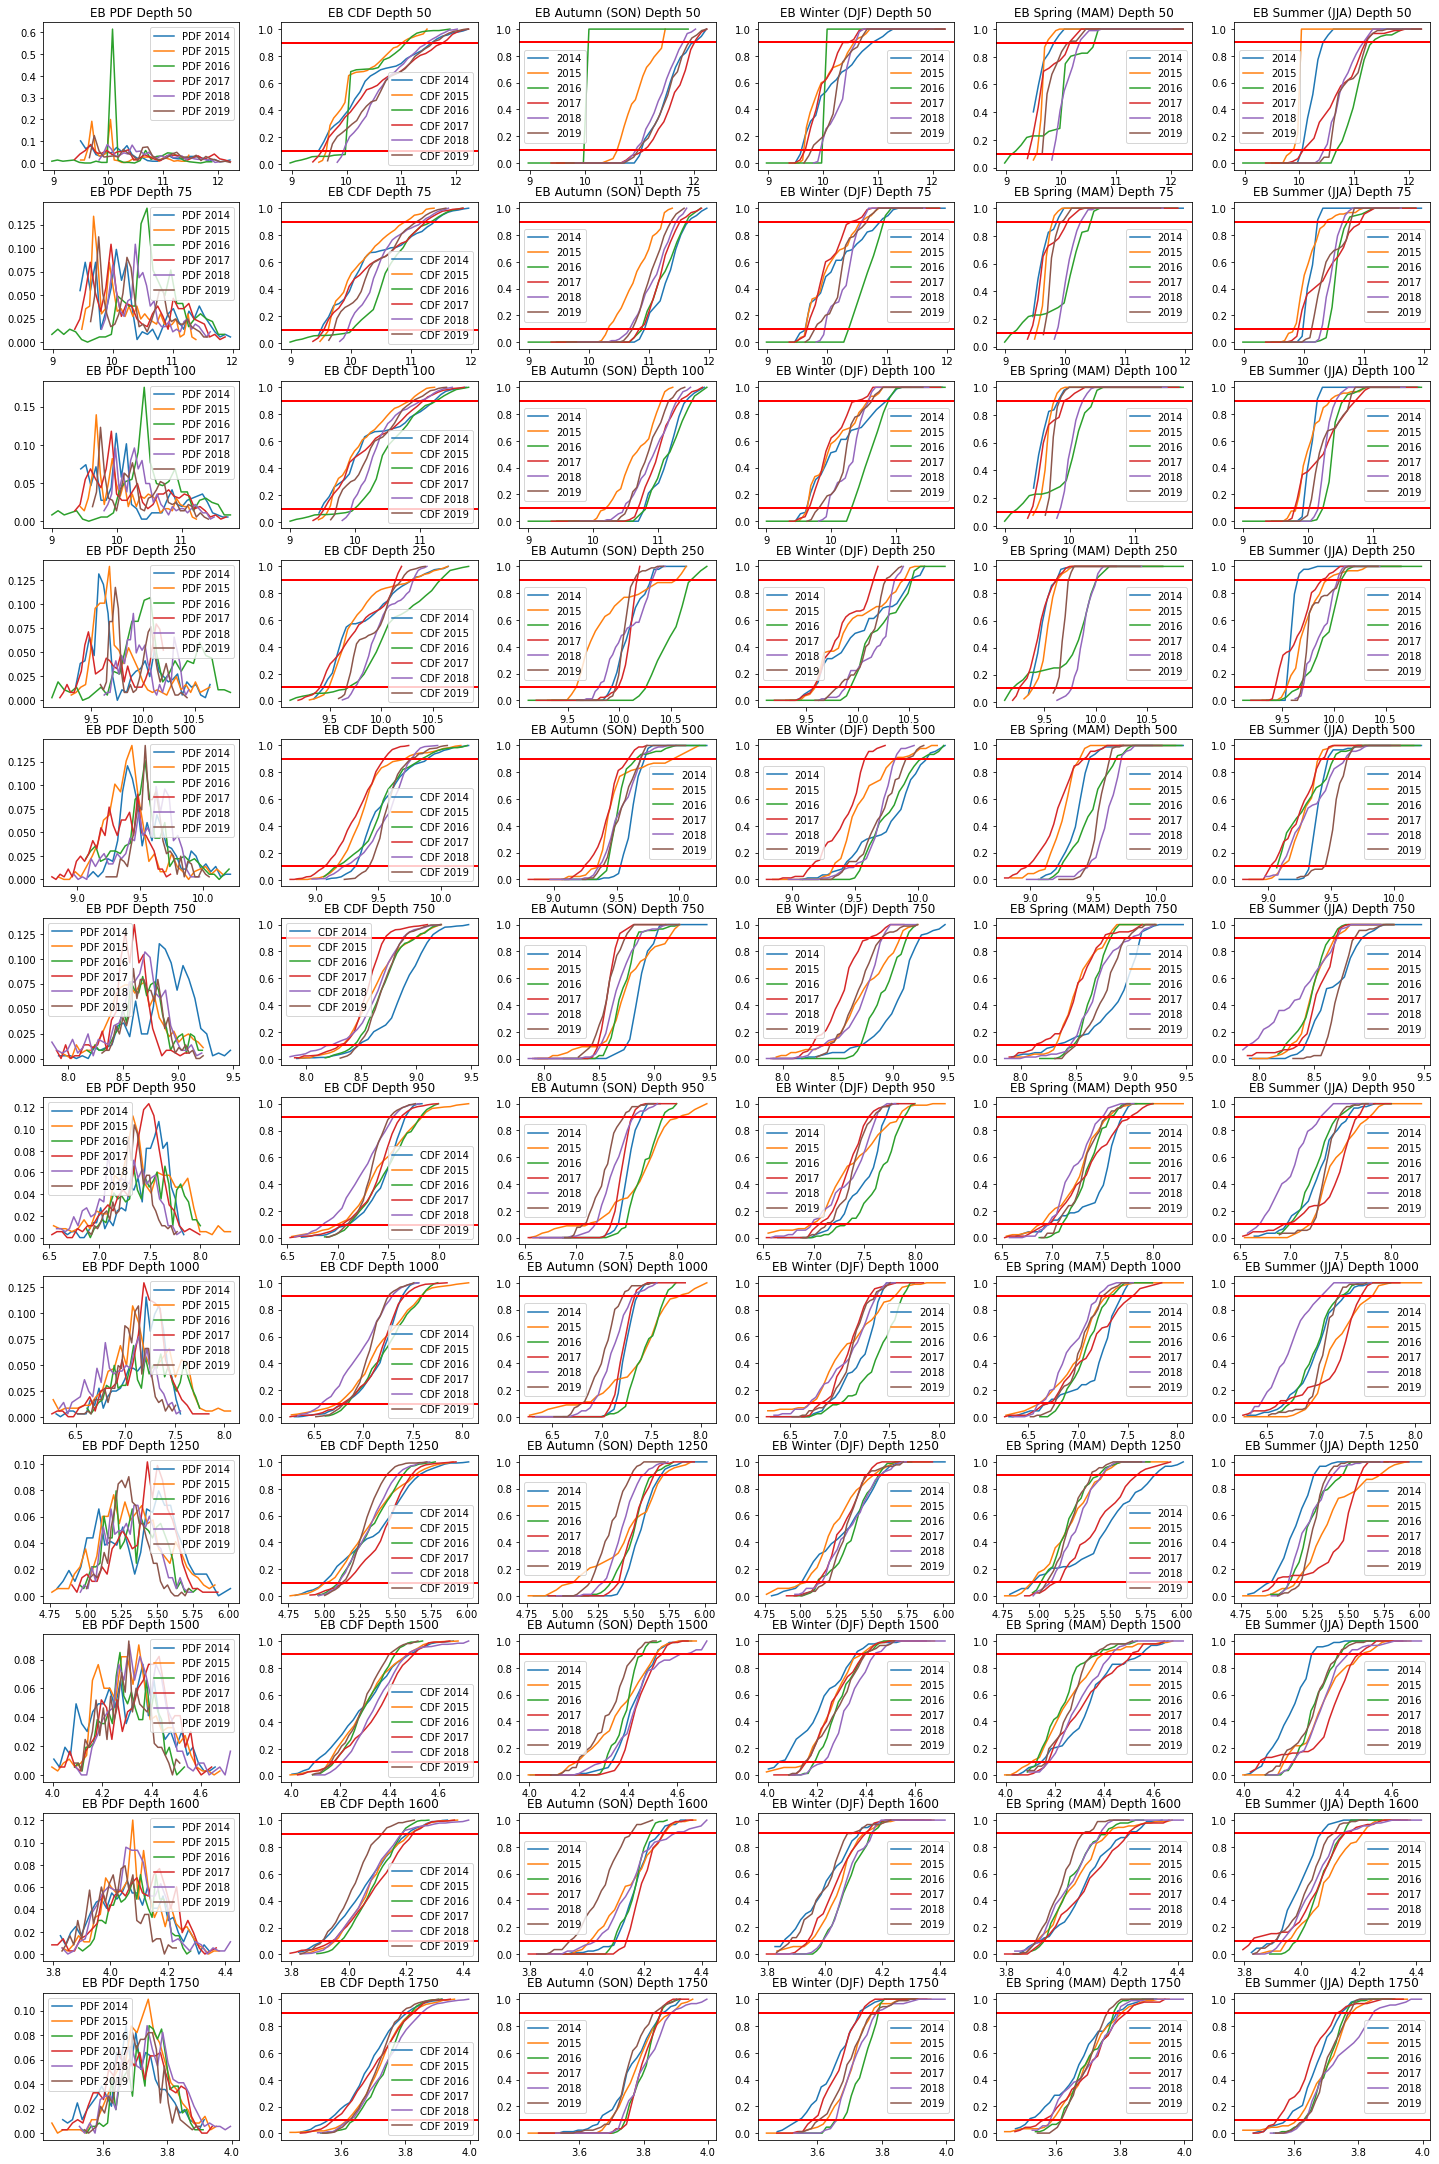

In [245]:
fig, ax = plt.subplots(len(depth_EB),6, figsize=(20,30))
fig.tight_layout()
m=0
for n in depth_EB:
    for y in [2014,2015,2016,2017,2018,2019]:
        y2 = y+1
        EB = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y}-09-01', f'{y2}-08-31')).sel(DEPTH=n, method='nearest'))
        EB_aut = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y}-09-01', f'{y}-11-30')).sel(DEPTH=n, method='nearest'))
        EB_wint = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y}-12-01', f'{y2}-02-28')).sel(DEPTH=n, method='nearest'))
        EB_spr = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y2}-03-01', f'{y2}-05-31')).sel(DEPTH=n, method='nearest'))
        EB_sum = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y2}-06-01', f'{y2}-08-31')).sel(DEPTH=n, method='nearest'))
        if any(~np.isnan(EB)):
            count, bins_count = np.histogram(EB, bins=30, range=[np.nanmin(EB),np.nanmax(EB)])
            bins = bins_count
            pdf = count / sum(count)
            cdf = np.cumsum(pdf)
            
            count, bins_count = np.histogram(EB_aut, bins=30, range=[np.nanmin(EB),np.nanmax(EB)])
            bins_aut = bins_count
            cdf_aut = np.cumsum(count / sum(count))
            
            count, bins_count = np.histogram(EB_wint, bins=30, range=[np.nanmin(EB),np.nanmax(EB)])
            bins_wint = bins_count
            cdf_wint = np.cumsum(count / sum(count))
            
            count, bins_count = np.histogram(EB_spr, bins=30, range=[np.nanmin(EB),np.nanmax(EB)])
            bins_spr = bins_count
            cdf_spr = np.cumsum(count / sum(count))
            
            count, bins_count = np.histogram(EB_sum, bins=30, range=[np.nanmin(EB),np.nanmax(EB)])
            bins_sum = bins_count
            cdf_sum = np.cumsum(count / sum(count))

            # plotting PDF and CDF and CDF for all seasons
            ax[m,0].set_title(f'EB PDF Depth {n}')
            ax[m,0].plot(bins[1:], pdf, label=f"PDF {y}")
            ax[m,0].legend();
            ax[m,1].set_title(f'EB CDF Depth {n}')
            ax[m,1].plot(bins[1:], cdf, label=f"CDF {y}")
            ax[m,1].legend(); 
            ax[m,1].axhline(y = 0.1, color = 'r')
            ax[m,1].axhline(y = 0.9, color = 'r')
            ax[m,2].set_title(f'EB Autumn (SON) Depth {n}')
            ax[m,2].plot(bins_aut[1:], cdf_aut, label=f"{y}")
            ax[m,2].legend(); 
            ax[m,2].axhline(y = 0.1, color = 'r')
            ax[m,2].axhline(y = 0.9, color = 'r')  
            ax[m,3].set_title(f'EB Winter (DJF) Depth {n}')
            ax[m,3].plot(bins_wint[1:], cdf_wint, label=f"{y}")
            ax[m,3].legend(); 
            ax[m,3].axhline(y = 0.1, color = 'r')
            ax[m,3].axhline(y = 0.9, color = 'r')
            ax[m,4].set_title(f'EB Spring (MAM) Depth {n}')
            ax[m,4].plot(bins_spr[1:], cdf_spr, label=f"{y}")
            ax[m,4].legend(); 
            ax[m,4].axhline(y = 0.1, color = 'r')
            ax[m,4].axhline(y = 0.9, color = 'r')
            ax[m,5].set_title(f'EB Summer (JJA) Depth {n}')  
            ax[m,5].plot(bins_sum[1:], cdf_sum, label=f"{y}")
            ax[m,5].legend(); 
            ax[m,5].axhline(y = 0.1, color = 'r')
            ax[m,5].axhline(y = 0.9, color = 'r')
    m=m+1
fig.savefig('figures/EB_stats_pdf+cdf', dpi = 300)

In [230]:
## experiment

def plt_parameters(data):
    count, bins_count = np.histogram(data, bins=30, range=[np.nanmin(EB),np.nanmax(EB)])
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    return bins_count, cdf
    

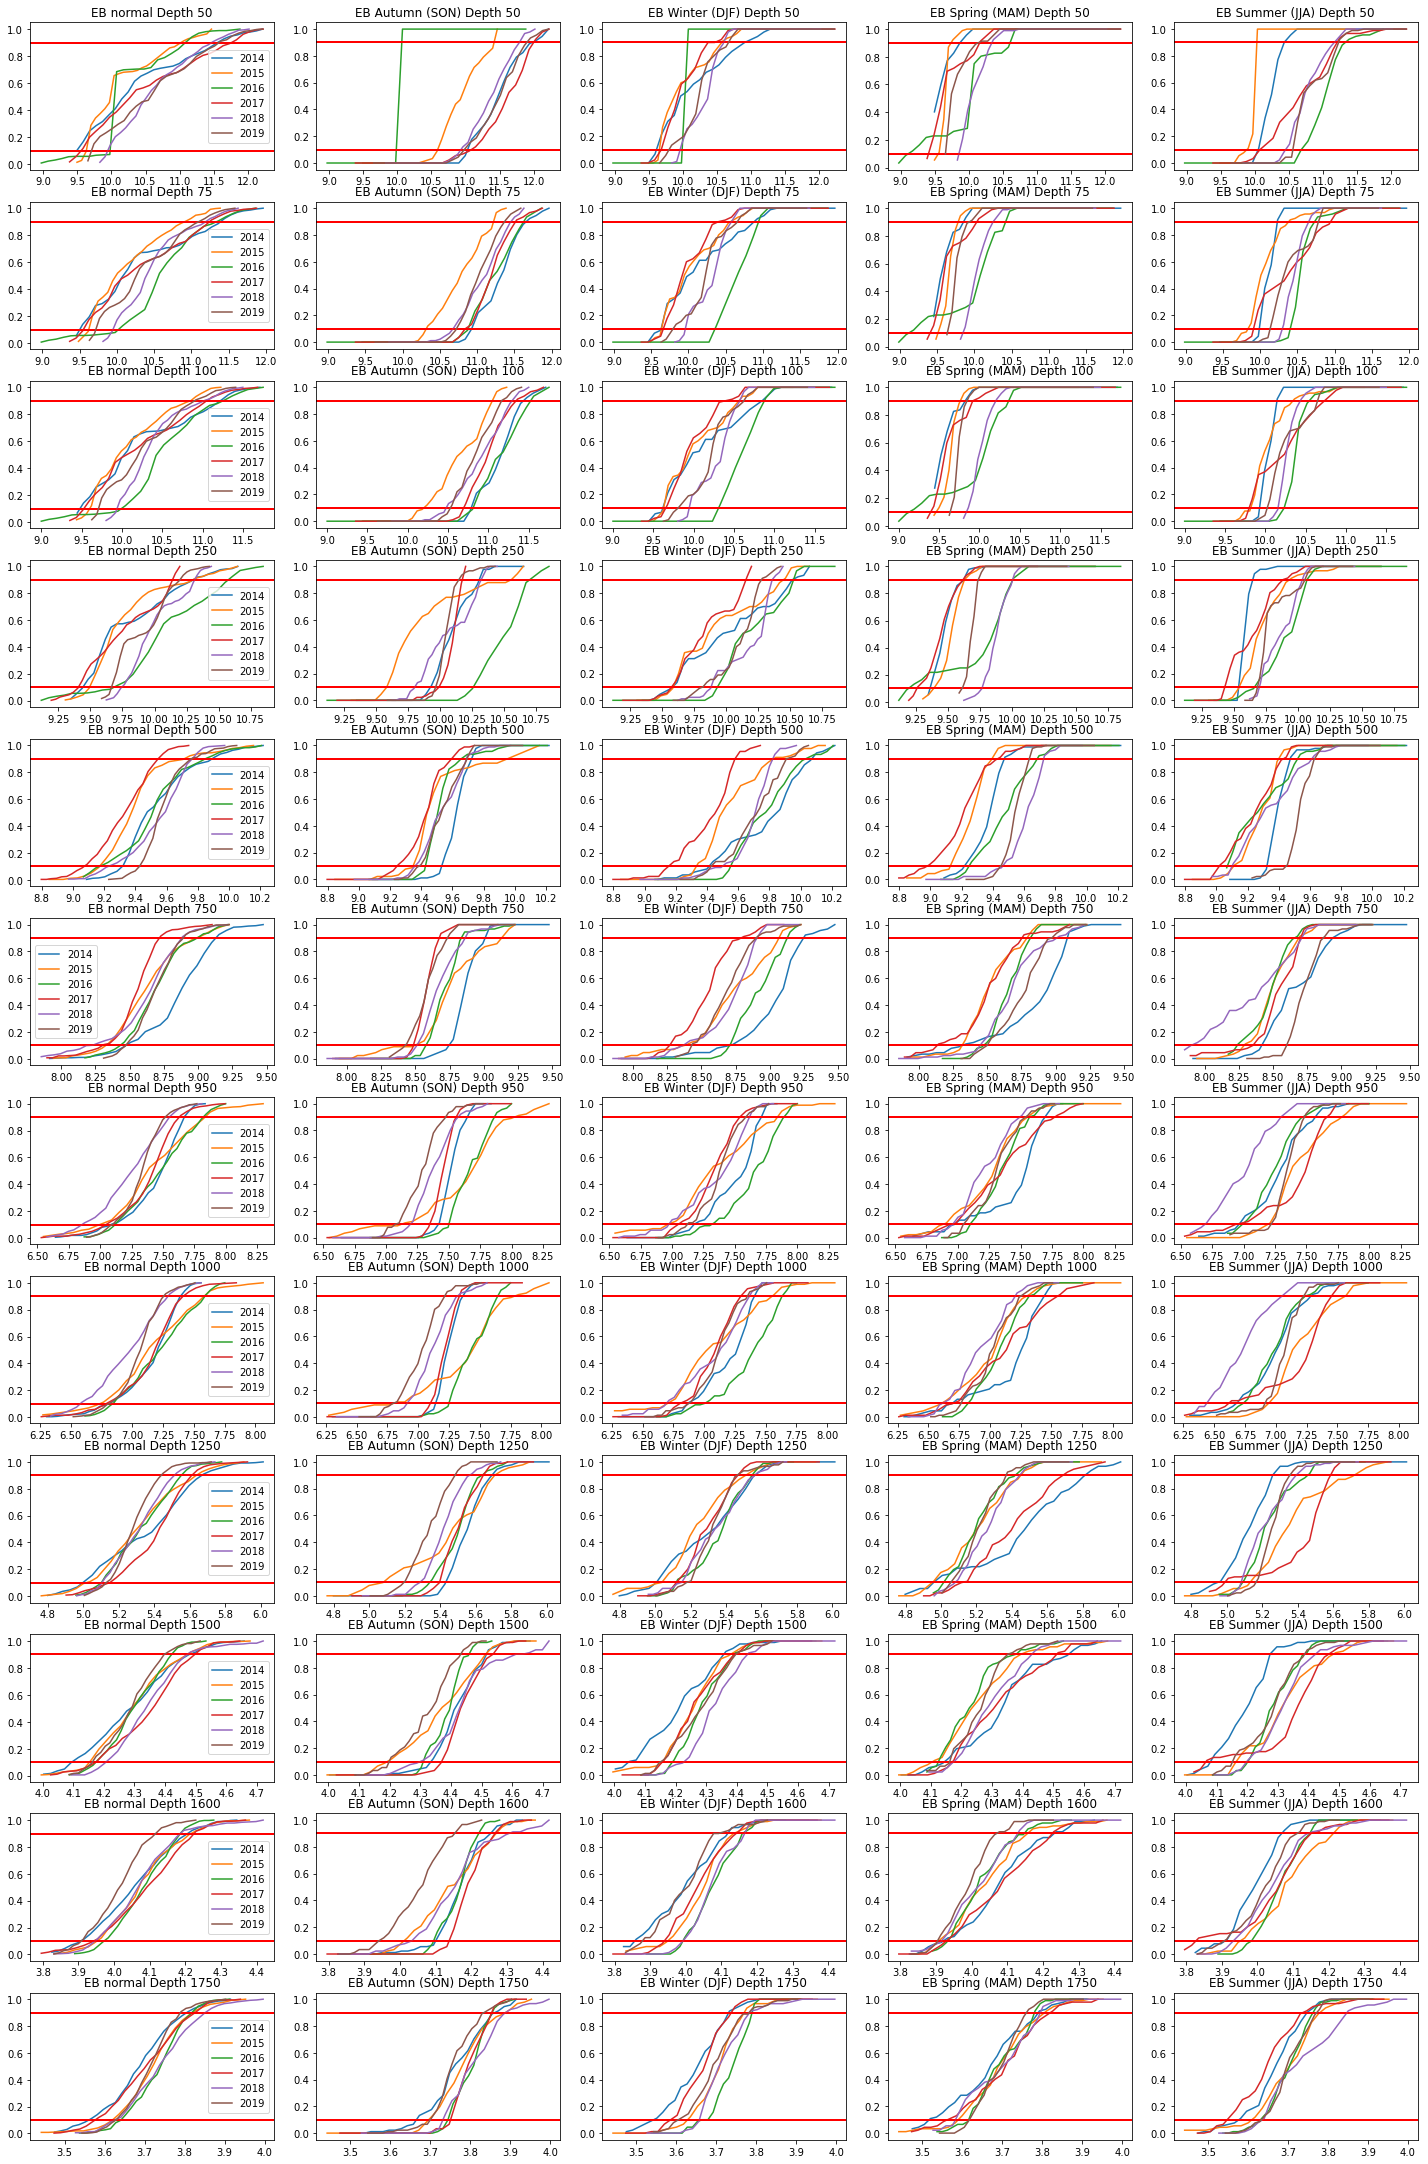

In [248]:
fig, ax = plt.subplots(len(depth_EB),5, figsize=(20,30))
fig.tight_layout()
m=0
for n in depth_EB:
    for y in [2014,2015,2016,2017,2018,2019]:
        y2 = y+1
        b = 0
        EB = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y}-09-01', f'{y2}-08-31')).sel(DEPTH=n, method='nearest'))
        EB_aut = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y}-09-01', f'{y}-11-30')).sel(DEPTH=n, method='nearest'))
        EB_wint = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y}-12-01', f'{y2}-02-28')).sel(DEPTH=n, method='nearest'))
        EB_spr = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y2}-03-01', f'{y2}-05-31')).sel(DEPTH=n, method='nearest'))
        EB_sum = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y2}-06-01', f'{y2}-08-31')).sel(DEPTH=n, method='nearest'))
        for a, bla in zip(['normal', 'Autumn (SON)', 'Winter (DJF)', 'Spring (MAM)', 'Summer (JJA)'],[EB, EB_aut, EB_wint, EB_spr, EB_sum]):
            if any(~np.isnan(bla)):
                bins_count, cdf = plt_parameters(bla)
                plt.grid()
                ax[m,b].axhline(y = 0.1, color = 'r')
                ax[m,b].axhline(y = 0.9, color = 'r')
                ax[m,b].set_title(f'EB {a} Depth {n}')
                ax[m,b].plot(bins_count[1:], cdf, label=f"{y}")
            b=b+1
    ax[m,0].legend()        
    m=m+1;
fig.savefig('figures/EB_stats_cdf', dpi = 300)